<a href="https://colab.research.google.com/github/zimzion/EYTIP/blob/master/class_0N_Convex_of_Loss_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import random as r

In [0]:
misclass_ratio = 0.1
n_points = 100
n_misclass = int(misclass_ratio*n_points)
split_line = (0.5, 1)
colors = ['r', 'b']

x_rnd = [r.random()*r.choice([1, -1]) for _ in range(n_points)]
y_rnd = [r.random()*r.choice([1, -1]) for _ in range(n_points)]
dots = [split_line[0]*x + split_line[1]*y for x, y in zip(x_rnd, y_rnd)]
cate = [1 if dot >= 0.0 else 0 for dot in dots]
cate_change = [(i+1)%2 for i in cate[:n_misclass]]
cate[:n_misclass] = cate_change
dot_colors = [colors[i] for i in cate]

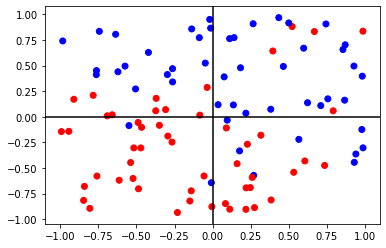

In [26]:
fig, ax = plt.subplots()
ax.scatter(x_rnd, y_rnd, color=dot_colors)
ax.axhline(0, color='k')
ax.axvline(0, color='k')
plt.show()

In [0]:
%matplotlib inline
import numpy as np
from mpl_toolkits import mplot3d


In [0]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5, 0, 'z')

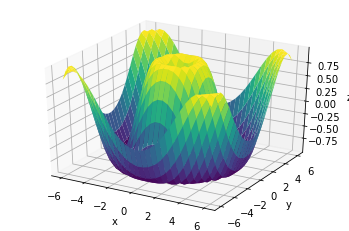

In [37]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [0]:
import math
import numpy as np

def predict(w0, w1, x):
  exp_part = [math.exp(-1*(w0+w1*v)) for v in x]
  yhat = [1.0/(1.0 + v) for v in exp_part]
  return yhat

In [0]:
def calc_rmse(w0, w1):
  rmse_list = list()
  for row0, row1 in zip(w0, w1):
    rmse_row = list()
    for e0, e1 in zip(row0, row1):
      yhat = predict(e0, e1, x_rnd)
      rmse = sum([(v - vhat)**2 for v, vhat in zip(y_rnd, yhat)]) / n_points
      rmse_row.append(rmse)
    rmse_list.append(rmse_row)

  rmse_array = np.array(rmse_list)
  return rmse_array

In [0]:
w0 = np.linspace(-100, 100, 200)
w1 = np.linspace(-100, 100, 200)

X, Y = np.meshgrid(w0, w1)
RMSE = calc_rmse(X, Y)

Text(0.5, 0, 'rmse')

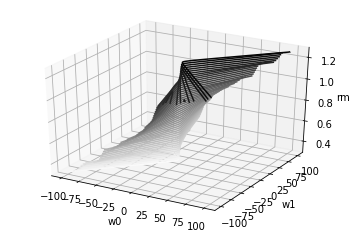

In [98]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, RMSE, 50, cmap='binary')
#ax.plot_surface(X, Y, RMSE, rstride=1, cstride=1,
#                cmap='viridis', edgecolor='none')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('rmse')

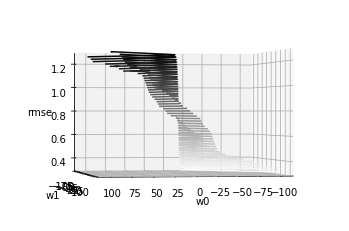

In [105]:
ax.view_init(0, 80)
fig